In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# make the most recent date a datetime object
most_recent = dt.datetime.strptime(recent_str, '%Y-%m-%d')

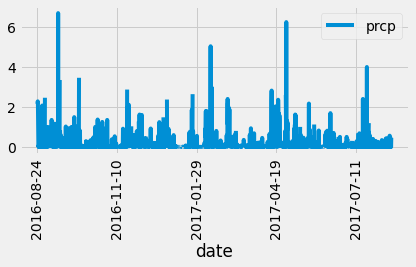

<Figure size 432x288 with 0 Axes>

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
one_year = most_recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
result_df = pd.DataFrame(results, columns=['date', 'prcp'])
# result_df.set_index('date', inplace=True)
# tried setting the index but it messed up the graph

# Sort the dataframe by date
result_df = result_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
result_df.plot(x='date', y='prcp', rot=90)
plt.tight_layout()
plt.show()
plt.savefig('Images/precip.png')

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
result_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
print(f"There are {total_stations} stations in the dataset.")

There are 9 stations in the dataset.


In [13]:
from sqlalchemy import desc

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc())

most_active_id = active[0][0]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_id).all()

min_temp = most_active_data[0][0]
max_temp = most_active_data[0][1]
avg_temp = most_active_data[0][2]

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_year = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_id).\
    filter(Measurement.date > one_year).all()

active_temps = list(np.ravel(active_year))

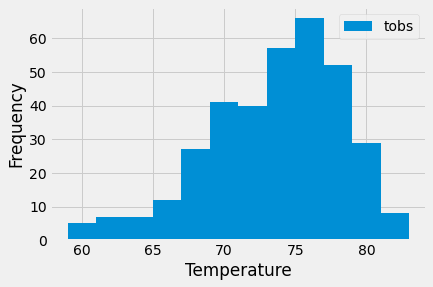

In [18]:
plt.hist(active_temps, bins=12, label='tobs')
plt.gca().set(xlabel='Temperature', ylabel='Frequency')
plt.legend()
plt.savefig('Images/hist.png')

# Close session

In [19]:
# Close Session
session.close()